### Rede Neural
![Texto Alternativo](rede.png)

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [150]:
# Definimos estilos (opcional)
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (6, 3)

### Dataset
- Este dataset inclue uma tabela de dados que simulam os pesos em função da altura das pessoas. 

In [151]:
# Criando o data-set

def weight_data(x, w, b, noise_scale = 4.5):
    """
    A função retorna o peso em kg das pessoas
    """
    return w * x + b + noise_scale * np.random.uniform(1.10, 1.8, x.shape[0]) 


x = np.arange(1.5,1.95, 0.01)
Y = weight_data(x, w = 40, b = 1.4)
print(x)
print(f'pesos: {Y}')

[1.5  1.51 1.52 1.53 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63
 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77
 1.78 1.79 1.8  1.81 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91
 1.92 1.93 1.94]
pesos: [68.87861175 68.35338425 67.21961418 68.26852503 71.07001639 68.78267573
 70.62344845 69.33782203 70.76828709 70.56309786 73.2248332  72.52411348
 71.58003739 73.73944076 74.23279574 75.37941851 75.48471118 73.50146077
 75.36337798 76.55563115 75.36223217 74.77488915 77.90159175 76.08220837
 78.16703618 77.12551327 79.20138202 77.76851539 79.86502396 78.7207459
 79.94909788 80.69614895 79.5720184  80.90948788 82.24575437 82.07114893
 83.15466607 82.25413262 81.7174301  82.44882104 82.55604199 84.58708156
 84.86294474 85.15192073 86.69063833]


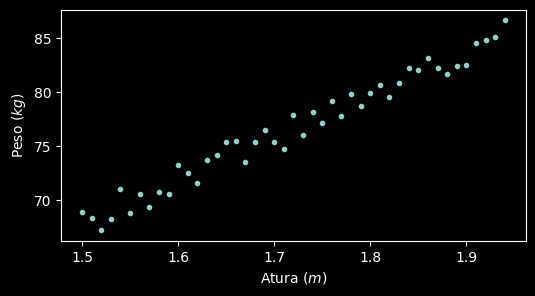

In [152]:
plt.scatter(x, Y, marker = ".");
plt.xlabel(rf'Atura ($m$)');
plt.ylabel(rf'Peso ($kg$)');

### Regressão Linear com SKLearn
Neste ponto, vamos fazer uma regressão linear dos dados usando um modelo de regressão linear de machine learning

In [153]:
from sklearn.linear_model import LinearRegression
from matplotlib.font_manager import FontProperties
fonte = FontProperties(family='sans-serif', size=10, weight='normal', style='normal')

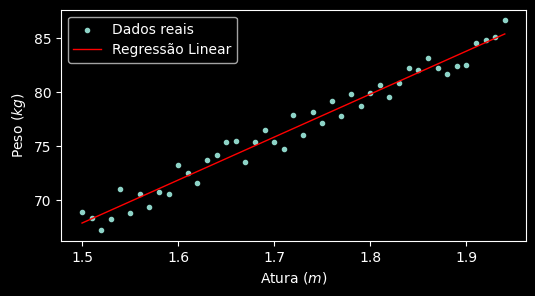

In [154]:
# Cria o modelo de regressão linear
modelo = LinearRegression()
x = x.reshape(-1, 1)
Y = Y.reshape(-1, 1)
# Treina o modelo
modelo.fit(x,Y)

# Fazer previsões
y_pred = modelo.predict(x)
# Plota os resultados

plt.scatter(x, Y, label = 'Dados reais', marker = ".");
plt.plot(x, y_pred, color = 'red', label='Regressão Linear',  lw = 1);
plt.xlabel(rf'Atura ($m$)');
plt.ylabel(rf'Peso ($kg$)');
plt.legend(prop=fonte);


### Modelo

- Iniciar os pesos e bias
- Feedforward
- Calcular a perda
- Backpropagation

In [155]:
# Feedfoward
def forward(inputs, weight, bias):
    """
    Define uma reta com peso e bias
    """
    return weight*inputs + bias

### Cálculo do erro
Usamos a MSE (Mean Squared Error)
$$\frac{1}{n}\sum^n_{-=1} (Y_i-y_i)^2$$
onde $Y_i$ são os valores reais, $y_i$ os valores previstos e $n$ é o número de amostras.

In [156]:
def mse(target, output):
    """
    Calcula o erro dos pontos em relação à reta
    """
    return (target-output)**2

### Back propagation
- Atualização dos pesos:
$$w_{\text{novo}} = w_{\text{antigo}} - \eta \frac{d\epsilon}{dw}$$

- Atualização dos bias:
$$b_{\text{novo}} = b_{\text{antigo}} - \eta \frac{d\epsilon}{db}$$

In [157]:
# O pack propagation atualiza os pesos e Bias da rede neural
def backpropagation(inputs, outputs, target, weight, bias, lr): # lr é o learn rate representado pelo eta
    """
    Calculo da derivada da função erro
    """
    dw = lr*(-2*inputs*(target - outputs)).mean() # derivada do erro com relação ao peso (taget = Y é o valor real e outputs = y previsto)
    db = lr*(-2*(target - outputs)).mean() # derivada do erro com relação ao bias
    weight -= dw
    bias -= db
    return weight, bias

In [158]:
def model_fit(inputs, target, weight, bias, epochs = 100, lr = 0.001):
    weight_update = []
    bias_update = []
    for epoch in range(epochs): # as épocas são as iterações
        outputs = forward(inputs, weight, bias) # define quem é o output com a função foward
        loss = np.mean(mse(target, outputs)) # calcula a perda com a média da função mse
        weight, bias = backpropagation(inputs, outputs, target, weight, bias, lr) # define os pesos e bias novos com backpropagation
        # Armazenar histórico a cada época
        weight_update.append(weight[0])
        bias_update.append(bias[0])
    return weight_update, bias_update

In [159]:
# Iniciar a rede neural: Os parâmetros da rede são weight e Bias
weight = np.random.rand(1)
actualw, actualb = model_fit(x, Y, weight, bias, epochs=10, lr=0.15)
print(f'valor dos pesos: {actualw}')
print(f'valor dos bias: {actualb}')

valor dos pesos: [35.46740510607136, 28.80970858398754, 30.09850074139211, 29.867064492221328, 29.926437443093885, 29.930157678448342, 29.944505385617845, 29.95680080694794, 29.969469677665504, 29.98204796505045]
valor dos bias: [42.679440029654735, 38.795792902122145, 39.512611318244595, 39.34936745630955, 39.35451785752714, 39.32748669572922, 39.30664524102777, 39.2846528058373, 39.26291366379763, 39.241159127079605]


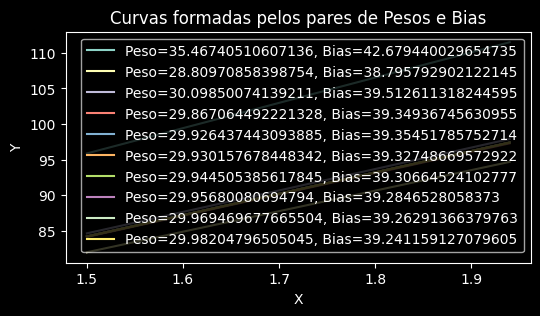

In [161]:
# Plot do gráfico
# Lista para armazenar as curvas
# Lista para armazenar as curvas
curvas = []

# Função para atualização da animação
def update(frame):
    plt.clf()  # Limpa o gráfico a cada frame para criar a animação
    for i, (w, b) in enumerate(zip(actualw, actualb)):
        y = w * x + b
        plt.plot(x, y, label=f'Peso={w}, Bias={b}', color=f'C{i}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Curvas formadas pelos pares de Pesos e Bias')

# Criação da animação
ani = FuncAnimation(plt.figure(), update, frames=50, interval=100)

# Exibição da animação no Jupyter Notebook
plt.close()
HTML(ani.to_jshtml())
#plt.scatter(x, Y, marker='.', label = 'Dados reais')
#plt.plot(x, foward(x, weight, bias), 'r', lw = 1, label = 'Regressão linear')
#plt.xlabel(rf'Atura ($m$)');
#plt.ylabel(rf'Peso ($kg$)');
#plt.legend(prop=fonte);